Import gradient descent, function, numpy, and copy


In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib . pyplot as plt
from numpy.linalg import inv  #. this is to compute inverse matrix
import copy
from sklearn.linear_model import LinearRegression

In [2]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])  # this is the value of inner product
    return a.T



def least_squares (w,x,y):
    cost = np.sum ((model(x,w)- y)**2)
    return cost/float(y.size)

<br>The code below is the gradient descent function written by myself
<br>

In [3]:
def my_new(g):  # Question partA. This is the function to replace autograd 
    def my_own_gradient_descent(w):
        grads = []   
        for i in range(len(w)):    # calculate gradients for each parameter
            temp_low = copy.copy(w) 
            temp_high = copy.copy(w) 
            temp_low[i] = temp_low[i] - temp_low[i]*0.0000001  #0.00001 is the 
            temp_high[i] = temp_high[i] + temp_high[i]*0.0000001
            
            value_low = g(temp_low)
            value_high = g(temp_high)
            
            grads.append((value_high - value_low)/(temp_high[i] -temp_low[i] ))
            
        return grads
    return my_own_gradient_descent

In [4]:
def gradient_descent (g, step, max_its ,w, p):
# compute gradient
    gradient = my_new(g)
    weight_history = [w] # weight history
    cost_history = [g(w)] # cost history container

    for k in range(max_its):
        
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval /np.linalg.norm(grad_eval)
        
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step

        w = w -alpha*grad_eval_norm

        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history , cost_history

Generate the orginal date of: Y = aX + b

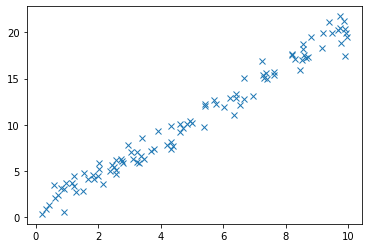

In [6]:
x = 10* np.random.rand(1,100) # row. column
y = .5 + 2*x + np.random.randn(1, 100)
plt.figure(1)
plt.plot(x.T,y.T,'x')



[0.62044177]
[1.97986337]
[0.62044177] [1.97986337]


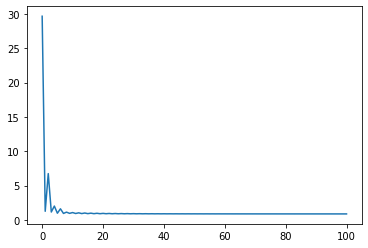

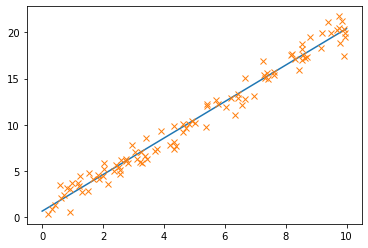

In [8]:
def c(t):
    c = least_squares(t,x,y)
    return c
    
w = np.array ([[1.0], [1.0]])
a, b = gradient_descent(c,'d',100,w,0) #

plt.figure(0)
plt.plot(b)
plt.figure(1)

xp =[0, 10]
plt.plot(xp,a[100][0]+ a[100][1]* xp) #w0 +w1*xp
plt.plot(x.T,y.T,'x')
print(a[100][0])  #this is the array of w0
print(a[100][1])  ##this is the array of w1
print(a[100][0], a[100][1])

The value of w0 and W1:
[0.15089426] [2.0439993]


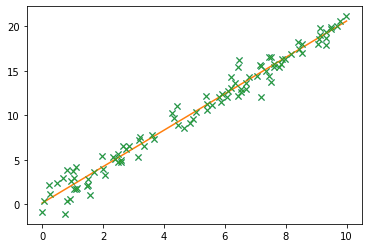

In [10]:
def Normal_Equation(X, Y):  # This is Question Part B, uses close-form solution
    X_Trans = X.T  
    Cal_weights = inv(X_Trans.dot(X)).dot(X_Trans).dot(Y)  
    return Cal_weights[0], Cal_weights[1]# returns W0 and W1

x = 10* np.random.rand(1,100) # row. column
y = .5 + 2*x + np.random.randn(1, 100)

plt.figure(1)
plt.plot(x.T,y.T,'x')

X_T = x.T
Y_T = y.T

#The code below: add colum to the most left of the matrix,also have np.r_ for row operation

X_With_W0 = np.c_[np.ones((100, 1)), X_T] 

a = Normal_Equation(X_With_W0, Y_T)
#print(a)
# Let's test out prediction line 
xp =[0, 10]
plt.plot(xp,a[0]+ a[1]* xp) #w0 +w1*xp
plt.plot(x.T,y.T,'x')
print("The value of w0 and W1:")
print(a[0], a[1])

 Use scikit-learn to minimize g(w) with respect to w

[0.27854502] [[2.04546811]]


array([[ 2.32401313],
       [ 4.36948125],
       [ 6.41494936],
       [ 8.46041747],
       [10.50588559]])

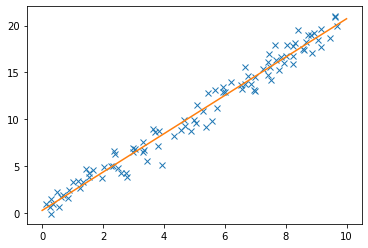

In [12]:
# Use scikit-learn to minimize g(w) with respect to w
x = 10* np.random.rand(1,100) # row. column
X_T = x.T
y = .5 + 2*x + np.random.randn(1, 100)
Y_T = y.T
#print(x)

reg = LinearRegression().fit(X_T, Y_T)
reg.score(X_T, Y_T)

plt.figure(1)
plt.plot(X_T, Y_T ,'x')

xp =[0, 10]

plt.plot(xp,reg.intercept_[0] + reg.coef_[0]* xp) #w0 +w1*xp

#print the coefficients from the sklearn
print(reg.intercept_, reg.coef_)

#print the predicted value
reg.predict(np.array([[1],[2],[3],[4],[5]]))